# Data in Motion Weekly Data Analysis Challenge
## Week 12: Wind Stats

Link to dataset: 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/Wind_Stats/wind.data' 

Challenge Questions:

1.    Year 2061? Do we really have data from this year? Create a function to fix it and apply it.
2.    Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].
3.    Compute how many values are missing for each location over the entire record.
4.    Compute how many non-missing values there are in total.
5.    Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days.
6.    Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day.
7.    Find the average windspeed in January for each location.
8.    Downsample the record to a yearly frequency for each location.
9.    Downsample the record to a monthly frequency for each location.
10.   Downsample the record to a weekly frequency for each location.

In [1]:
# import libraries

import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read in data:
url = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/Wind_Stats/wind.data' 
df = pd.read_csv(url, sep = "\s+", parse_dates = [[0,1,2]]) 

In [3]:
# view head of data
df.head(5)

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [4]:
# view info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6574 entries, 0 to 6573
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Yr_Mo_Dy  6574 non-null   datetime64[ns]
 1   RPT       6568 non-null   float64       
 2   VAL       6571 non-null   float64       
 3   ROS       6572 non-null   float64       
 4   KIL       6569 non-null   float64       
 5   SHA       6572 non-null   float64       
 6   BIR       6574 non-null   float64       
 7   DUB       6571 non-null   float64       
 8   CLA       6572 non-null   float64       
 9   MUL       6571 non-null   float64       
 10  CLO       6573 non-null   float64       
 11  BEL       6574 non-null   float64       
 12  MAL       6570 non-null   float64       
dtypes: datetime64[ns](1), float64(12)
memory usage: 667.8 KB


### 1.    Year 2061? Do we really have data from this year? Create a function to fix it and apply it.

In [5]:
# view all year values
df['Yr_Mo_Dy'].dt.year.unique()

array([2061, 2062, 2063, 2064, 2065, 2066, 2067, 2068, 2069, 2070, 2071,
       2072, 1973, 1974, 1975, 1976, 1977, 1978])


**It appears that 2061 and the subsequent years should really be 1961, 1962 and so on. I will create a function to subtract 100 years from any date that after the year 1960.**

In [6]:
# define a lambda function to subtract 100 years from the date if the year is after 2000
subtract_100_years = lambda x: x - timedelta(days=36525) if x.year > 2060 else x

# apply the lambda function to the date column using the apply method
df['Yr_Mo_Dy'] = df['Yr_Mo_Dy'].apply(subtract_100_years)

df

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,1978-12-30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


### 2.    Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].

In [7]:
# set Yr_Mo_Dy column as the index
df.set_index('Yr_Mo_Dy')

# check the data types again
df.dtypes

Yr_Mo_Dy    datetime64[ns]
RPT                float64
VAL                float64
ROS                float64
KIL                float64
SHA                float64
BIR                float64
DUB                float64
CLA                float64
MUL                float64
CLO                float64
BEL                float64
MAL                float64
dtype: object

### 3.    Compute how many values are missing for each location over the entire record.

In [8]:
# create dataframe of missing value counts by column
missing = df.copy()\
          .isnull()\
          .sum()\
          .reset_index()

missing = missing.rename(columns={'index':'column', 0:'missing_values'})

missing

,column,missing_values
0,Yr_Mo_Dy,0
1,RPT,6
2,VAL,3
3,ROS,2
4,KIL,5
5,SHA,2
6,BIR,0
7,DUB,3
8,CLA,2
9,MUL,3


<AxesSubplot:xlabel='column', ylabel='missing_values'>

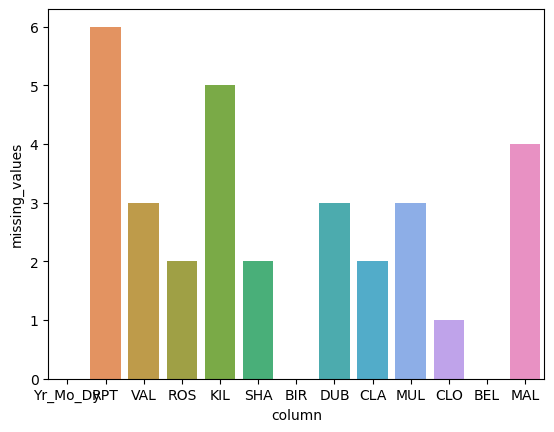

In [9]:
# view bar plot of missing values
sns.barplot(data=missing, x='column', y='missing_values')

### 4.    Compute how many non-missing values there are in total.

In [10]:
df.count().sum()

85431

**There are 85,431 non-missing values in total.**

### 5.    Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days.

In [11]:
# create dataframe from df.describe()
loc_stats = pd.DataFrame(df.describe())
loc_stats

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
count,6568.000000,6571.000000,6572.000000,6569.000000,6572.000000,6574.000000,6571.000000,6572.000000,6571.000000,6573.000000,6574.000000,6570.000000
mean,12.362987,10.644314,11.660526,6.306468,10.455834,7.092254,9.797343,8.495053,8.493590,8.707332,13.121007,15.599079
std,5.618413,5.267356,5.008450,3.605811,4.936125,3.968683,4.977555,4.499449,4.166872,4.503954,5.835037,6.699794
min,0.670000,0.210000,1.500000,0.000000,0.130000,0.000000,0.000000,0.000000,0.000000,0.040000,0.130000,0.670000
25%,8.120000,6.670000,8.000000,3.580000,6.750000,4.000000,6.000000,5.090000,5.370000,5.330000,8.710000,10.710000
50%,11.710000,10.170000,10.920000,5.750000,9.960000,6.830000,9.210000,8.080000,8.170000,8.290000,12.500000,15.000000
75%,15.920000,14.040000,14.670000,8.420000,13.540000,9.670000,12.960000,11.420000,11.190000,11.630000,16.880000,19.830000
max,35.800000,33.370000,33.840000,28.460000,37.540000,26.160000,30.370000,31.080000,25.880000,28.210000,42.380000,42.540000


In [12]:
# drop unwanted rows
loc_stats = loc_stats.drop(['count', '25%', '50%', '75%'])
loc_stats

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
mean,12.362987,10.644314,11.660526,6.306468,10.455834,7.092254,9.797343,8.495053,8.493590,8.707332,13.121007,15.599079
std,5.618413,5.267356,5.008450,3.605811,4.936125,3.968683,4.977555,4.499449,4.166872,4.503954,5.835037,6.699794
min,0.670000,0.210000,1.500000,0.000000,0.130000,0.000000,0.000000,0.000000,0.000000,0.040000,0.130000,0.670000
max,35.800000,33.370000,33.840000,28.460000,37.540000,26.160000,30.370000,31.080000,25.880000,28.210000,42.380000,42.540000


### 6.    Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day.

In [13]:
df.head()

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [14]:
# create copy of dataframe, group by day, add min, max, mean, and std columns
day_stats = df.copy()

day_stats['min'] = day_stats.min(numeric_only=True, axis=1)

day_stats['max'] = day_stats.max(numeric_only=True, axis=1)

day_stats['mean'] = day_stats.mean(numeric_only=True, axis=1)

day_stats['std'] = day_stats.std(numeric_only=True, axis=1)

# view head of day_stats
day_stats.head()

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,min,max,mean,std
0,1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04,9.29,18.50,13.153077,3.071092
1,1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83,6.50,17.54,11.441538,3.545621
2,1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71,6.17,18.50,11.748462,4.042014
3,1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88,1.79,11.75,6.640714,3.403233
4,1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83,6.17,13.33,10.504286,2.573737


### 7.    Find the average windspeed in January for each location.

In [15]:
# add column for month of year
jan = df.copy()
jan['month'] = jan['Yr_Mo_Dy'].dt.month
jan

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,month
0,1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04,1
1,1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83,1
2,1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71,1
3,1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88,1
4,1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08,12
6570,1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46,12
6571,1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58,12
6572,1978-12-30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79,12


In [16]:
# group by month, calculate mean by month
jan = jan.groupby('month').mean()
jan = jan.query("month == 1")
jan

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
month,,,,,,,,,,,,
1,14.847325,12.91456,13.299624,7.199498,11.667734,8.054839,11.819355,9.512047,9.543208,10.053566,14.55052,18.028763


<AxesSubplot:>

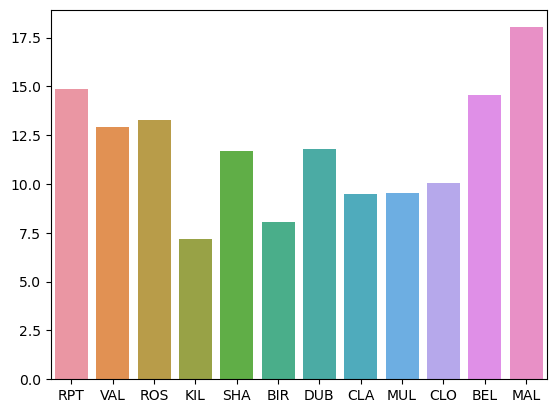

In [17]:
# plot values for jan
sns.barplot(data=jan)

### 8.    Downsample the record to a yearly frequency for each location.

In [18]:
yearly = df.resample('Y', on='Yr_Mo_Dy').sum()
yearly

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-12-31,4427.85,3747.35,4124.54,2511.92,3950.08,2821.35,3523.68,3215.74,3130.45,3580.15,4928.52,4952.44
1962-12-31,4457.88,3690.31,4282.44,2533.60,3890.14,2698.47,4022.56,3209.72,3035.64,3531.83,4719.70,5213.92
1963-12-31,4676.91,3955.50,4577.52,2675.47,4279.30,3078.67,4042.63,3772.84,3249.81,3731.92,4978.19,5474.64
1964-12-31,4525.10,3996.78,4430.20,2484.33,4192.34,2770.94,3754.85,3465.05,2850.78,3736.11,5029.04,5457.17
1965-12-31,4544.75,4042.57,4324.80,2503.34,4024.05,2729.51,3875.83,3241.17,2886.21,3620.10,4731.95,5690.95
1966-12-31,4913.62,4218.38,4387.53,2681.19,4308.84,2844.69,3861.63,3224.81,3107.77,3565.67,5207.03,5952.15
1967-12-31,4649.06,4011.71,4284.88,2607.35,4245.22,2689.38,3887.99,3403.85,3155.43,3484.81,5392.71,6254.62
1968-12-31,4331.84,3831.36,4175.97,2370.83,3938.44,2220.64,3242.46,3021.52,2644.33,2866.87,4687.96,5496.40
1969-12-31,4075.72,3549.15,3979.23,2105.31,3603.98,2259.34,3126.04,2814.66,2892.45,2830.35,4606.75,5753.46


### 9.    Downsample the record to a monthly frequency for each location.

In [19]:
monthly = df.resample('M', on='Yr_Mo_Dy').sum()
monthly

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01-31,445.24,359.65,416.38,239.84,321.11,266.23,346.73,277.36,281.66,313.33,430.31,455.80
1961-02-28,455.54,419.31,389.92,249.23,387.86,306.25,332.94,331.69,331.00,356.00,520.33,431.53
1961-03-31,326.70,350.19,333.34,218.52,325.79,274.87,298.97,304.72,298.53,348.81,508.74,471.60
1961-04-30,321.68,282.83,299.94,174.92,253.05,194.85,207.76,212.84,220.27,217.11,334.42,308.35
1961-05-31,305.69,265.50,335.36,177.16,294.20,203.82,228.12,253.49,249.22,263.48,368.91,372.36
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-08-31,299.00,256.04,280.00,139.59,228.41,183.99,175.16,167.95,224.48,171.64,324.47,373.68
1978-09-30,327.41,326.85,319.05,171.75,311.16,278.35,323.71,287.49,302.08,268.17,470.41,581.74
1978-10-31,306.83,268.80,288.17,146.36,264.28,210.00,251.58,227.47,257.23,255.56,427.08,531.65


### 10.   Downsample the record to a weekly frequency for each location.

In [21]:
weekly = df.resample('W', on='Yr_Mo_Dy').sum()
weekly

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,0.00,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-08,94.79,68.92,73.41,44.92,66.32,45.05,77.43,39.70,59.04,59.48,87.37,92.67
1961-01-15,87.28,62.77,83.71,32.41,51.46,35.51,52.75,47.74,39.99,53.00,77.88,77.17
1961-01-22,92.43,69.04,90.88,44.30,53.80,51.92,64.80,55.13,50.02,56.87,68.75,80.04
1961-01-29,119.28,112.99,127.58,89.04,122.03,103.80,108.70,106.12,101.36,109.48,146.51,157.71
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-03,104.54,78.63,97.59,38.96,71.51,60.33,67.50,53.80,63.08,66.83,82.85,131.10
1978-12-10,145.18,134.33,119.24,68.44,107.01,89.42,101.06,87.42,97.09,98.58,129.62,161.43
1978-12-17,117.31,102.85,104.91,48.42,79.78,50.91,71.46,55.77,64.18,59.96,77.72,108.94
